In [1]:
# 📚 Basic libraries
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<h1 style="color: #07caa6;">01 | Data Extraction</h1>

In [2]:
data = pd.read_csv('nndb_flat.csv')

In [3]:
data.head()

ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  

[5 rows x 45 columns]

Each record is for 100 grams.

The columns are mostly self-explanatory. The nutrient columns end with the units, so:
* Nutrient_g is in grams
* Nutrient_mg is in milligrams
* Nutrient_mcg is in micrograms
* Nutrient_USRDA is in percentage of US Recommended Daily Allows (e.g. 0.50 is 50%)

In [4]:
#Copy as best practices
df = data.copy()

<h2 style="color: #FF6347;">Exploring the Data (First impression)</h2>

In [5]:
df.shape

(8618, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


<h2 style="color: #FF6347;">Columns standardization</h2>

In [7]:
#df.columns = [column.lower().replace(" ", "_") for column in df.columns]

<h1 style="color: #07caa6;">02 | Data Cleaning </h1>

In [8]:
df.drop(columns=['ID','CommonName','MfgName','ScientificName'],inplace=True)

In [9]:
df.drop(columns=['VitA_USRDA','VitB6_USRDA','VitB12_USRDA','VitC_USRDA','VitE_USRDA','Folate_USRDA','Niacin_USRDA','Riboflavin_USRDA','Thiamin_USRDA','Calcium_USRDA','Copper_USRDA','Magnesium_USRDA','Phosphorus_USRDA','Selenium_USRDA','Zinc_USRDA'],inplace=True)

In [10]:
# Unified the unit of measurement for all Micronutrients
df['VitA_mg'] = df['VitA_mcg']/1000
df['VitB12_mg'] = df['VitB12_mcg']/1000
df['Folate_mg'] = df['Folate_mcg']/1000
df['Copper_mg'] = df['Copper_mcg']/1000
df['Selenium_mg'] = df['Selenium_mcg']/1000
df.drop(columns=['VitA_mcg','VitB12_mcg','Folate_mcg','Copper_mcg','Selenium_mcg'],inplace=True)


In [11]:
#df.eq(" ").sum() #Dealing with Empty Spaces

In [12]:
df.duplicated().sum() #Dealing with Duplicates

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FoodGroup      8618 non-null   object 
 1   ShortDescrip   8618 non-null   object 
 2   Descrip        8618 non-null   object 
 3   Energy_kcal    8618 non-null   float64
 4   Protein_g      8618 non-null   float64
 5   Fat_g          8618 non-null   float64
 6   Carb_g         8618 non-null   float64
 7   Sugar_g        8618 non-null   float64
 8   Fiber_g        8618 non-null   float64
 9   VitB6_mg       8618 non-null   float64
 10  VitC_mg        8618 non-null   float64
 11  VitE_mg        8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Iron_mg        8618 non-null   float64
 17  Magnesium_mg   8618 non-null   float64
 18  Manganes

In [14]:
df['FoodGroup'].value_counts()

FoodGroup
Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
R

In [15]:
df['FoodGroup'] = df['FoodGroup'].replace({'Beef Products':'Beef','Vegetables and Vegetable Products':'Vegetables','Legumes and Legume Products':'Legumes','Finfish and Shellfish Products':'Fish','Nut and Seed Products':'Nut and Seed'})

In [16]:
# Thiamin_mg : B1
# Riboflavin_mg : B2
# Niacin_mg : B3
# Folate_mg : B9

In [17]:
# consider first phrase as food name and the rest as description
df[['FoodName', 'Desc']] = df['Descrip'].str.split(',', n=1, expand=True)

df['FoodName'] = df['FoodName'].str.strip()
df['Desc'] = df['Desc'].str.strip()

In [18]:
df.drop(columns=['ShortDescrip','Descrip'],inplace=True)

In [19]:
# Move Food name and description to right
FoodName = df['FoodName']
df.drop(labels=['FoodName'], axis=1,inplace = True)
df.insert(0, 'FoodName', FoodName)

Desc = df['Desc']
df.drop(labels=['Desc'], axis=1,inplace = True)
df.insert(1, 'Desc', Desc)

In [20]:
df['FoodName']=df['FoodName']. apply(str. lower) 

In [21]:
df.sample(10)

FoodName                                               Desc  \
8198      frybread                            made with lard (Navajo)   
8134   cranberries                    wild, bush, raw (Alaska Native)   
910        chicken           roasting, meat and skin, cooked, roasted   
126            egg                            duck, whole, fresh, raw   
7697          soup                         wonton, Chinese restaurant   
7891       keebler                                       Waffle Cones   
6597  millet flour                                               None   
802        chicken  broilers or fryers, meat and skin and giblets ...   
367       babyfood                         vegetables, peas, strained   
3342       peppers                              hot chili, green, raw   

                                FoodGroup  Energy_kcal  Protein_g  Fat_g  \
8198  American Indian/Alaska Native Foods        330.0       6.69  12.22   
8134  American Indian/Alaska Native Foods         55.0       1.10   0.20   
910                      Poultry Products        223.0      23.97  13.39   
126                Dairy and Egg Products        185.0      12.81  13.77   
7697           Soups, Sauces, and Gravies         32.0       2.08   0.26   
7891                       Baked Products        424.0       6.50   5.30   
6597              Cereal Grains and Pasta        382.0      10.75   4.25   
802                      Poultry Products        234.0      26.78  13.27   
367                            Baby Foods         50.0       3.27   0.43   
3342                           Vegetables         40.0       2.00   0.20   

      Carb_g  Sugar_g  Fiber_g  VitB6_mg  ...  Iron_mg  Magnesium_mg  \
8198   48.26     2.03      0.0     0.038  ...     4.04          18.0   
8134   12.30     0.00      6.7     0.000  ...     1.00           0.0   
910     0.00     0.00      0.0     0.350  ...     1.26          20.0   
126     1.45     0.93      0.0     0.250  ...     3.85          17.0   
7697    5.25     0.34      0.2     0.076  ...     0.21           3.0   
7891   87.70    31.60      1.8     0.030  ...     3.00          15.0   
6597   75.12     1.66      3.5     0.372  ...     3.94         119.0   
802     0.06     0.00      0.0     0.380  ...     1.66          23.0   
367     8.36     2.01      2.0     0.016  ...     0.95          17.0   
3342    9.46     5.10      1.5     0.278  ...     1.20          25.0   

      Manganese_mg  Phosphorus_mg  Zinc_mg  VitA_mg  VitB12_mg  Folate_mg  \
8198         0.297          123.0     0.35    0.000    0.00000      0.196   
8134         0.000           15.0     0.00    0.000    0.00000      0.000   
910          0.018          179.0     1.45    0.000    0.00027      0.005   
126          0.038          220.0     1.41    0.194    0.00540      0.080   
7697         0.034           18.0     0.12    0.001    0.00009      0.018   
7891         0.000           80.0     0.70    0.000    0.00000      0.000   
6597         1.002          285.0     2.63    0.000    0.00000      0.042   
802          0.031          182.0     2.16    0.191    0.00094      0.029   
367          0.218           50.0     0.47    0.011    0.00000      0.028   
3342         0.237           46.0     0.30    0.059    0.00000      0.023   

      Copper_mg  Selenium_mg  
8198   0.000091       0.0186  
8134   0.000000       0.0000  
910    0.000058       0.0236  
126    0.000062       0.0364  
7697   0.000024       0.0011  
7891   0.000000       0.0000  
6597   0.000535       0.0327  
802    0.000080       0.0159  
367    0.000061       0.0001  
3342   0.000174       0.0005  

[10 rows x 26 columns]

In [22]:
df.shape

(8618, 26)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FoodName       8618 non-null   object 
 1   Desc           8469 non-null   object 
 2   FoodGroup      8618 non-null   object 
 3   Energy_kcal    8618 non-null   float64
 4   Protein_g      8618 non-null   float64
 5   Fat_g          8618 non-null   float64
 6   Carb_g         8618 non-null   float64
 7   Sugar_g        8618 non-null   float64
 8   Fiber_g        8618 non-null   float64
 9   VitB6_mg       8618 non-null   float64
 10  VitC_mg        8618 non-null   float64
 11  VitE_mg        8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Iron_mg        8618 non-null   float64
 17  Magnesium_mg   8618 non-null   float64
 18  Manganes

In [24]:
 df[df['Desc'].isnull()]

FoodName  Desc  \
55                                               eggnog  None   
162   kraft cheez whiz pasteurized process cheese sauce  None   
163   kraft cheez whiz light pasteurized process che...  None   
164   kraft free singles american nonfat pasteurized...  None   
165    kraft velveeta pasteurized process cheese spread  None   
...                                                 ...   ...   
8496                                    vegetarian stew  None   
8497                     vegetarian meatloaf or patties  None   
8562                               yeast extract spread  None   
8571                                        tofu yogurt  None   
8611                                 vital wheat gluten  None   

                    FoodGroup  Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  \
55     Dairy and Egg Products         88.0       4.55   4.19    8.05     8.05   
162    Dairy and Egg Products        276.0      12.00  21.00    9.20     6.70   
163    Dairy and Egg Products        215.0      16.30   9.50   16.20     8.20   
164    Dairy and Egg Products        148.0      22.70   1.00   11.70     6.70   
165    Dairy and Egg Products        303.0      16.30  22.00    9.80     8.10   
...                       ...          ...        ...    ...     ...      ...   
8496                  Legumes        123.0      17.00   3.00    7.00     1.25   
8497                  Legumes        197.0      21.00   9.00    8.00     1.20   
8562               Vegetables        185.0      23.88   0.90   20.42     1.60   
8571                  Legumes         94.0       3.50   1.80   15.96     1.24   
8611  Cereal Grains and Pasta        370.0      75.16   1.85   13.79     0.00   

      Fiber_g  VitB6_mg  ...  Iron_mg  Magnesium_mg  Manganese_mg  \
55        0.0      0.05  ...     0.20          19.0         0.005   
162       0.3      0.00  ...     0.19           0.0         0.000   
163       0.2      0.00  ...     0.16           0.0         0.000   
164       0.2      0.00  ...     0.05           0.0         0.000   
165       0.0      0.00  ...     0.18           0.0         0.000   
...       ...       ...  ...      ...           ...           ...   
8496      1.1      1.10  ...     1.30         127.0         0.000   
8497      4.6      1.20  ...     2.10          18.0         0.000   
8562      6.5      0.00  ...     4.04         180.0         0.261   
8571      0.2      0.02  ...     1.06          40.0         0.000   
8611      0.6      0.00  ...     5.20          25.0         0.000   

      Phosphorus_mg  Zinc_mg  VitA_mg  VitB12_mg  Folate_mg  Copper_mg  \
55            109.0     0.46    0.059    0.00045      0.001   0.000013   
162           806.0     1.64    0.000    0.00000      0.000   0.000000   
163           943.0     2.36    0.000    0.00000      0.000   0.000000   
164           923.0     2.50    0.000    0.00000      0.000   0.000000   
165           863.0     1.84    0.000    0.00000      0.000   0.000000   
...             ...      ...      ...        ...        ...        ...   
8496          220.0     1.10    0.047    0.00220      0.103   0.000649   
8497          344.0     1.80    0.000    0.00240      0.078   0.000706   
8562          104.0     4.19    0.000    0.00050      5.881   0.000245   
8571           38.0     0.31    0.002    0.00000      0.006   0.000075   
8611          260.0     0.85    0.000    0.00000      0.000   0.000182   

      Selenium_mg  
55         0.0042  
162        0.0000  
163        0.0000  
164        0.0000  
165        0.0000  
...           ...  
8496       0.0005  
8497       0.0008  
8562       0.0276  
8571       0.0130  
8611       0.0397  

[149 rows x 26 columns]

In [25]:
df['Desc'].fillna('No_descr', inplace=True)

In [26]:
df.to_csv('after_cleaning.csv', index = False)

<h1 style="color: #07caa6;">03 | EDA </h1>

<h2 style="color: #FF6347;">Descriptive Statistics</h2>

In [27]:
df.describe().T.round(4)

count      mean       std  min      25%       50%       75%  \
Energy_kcal    8618.0  226.4386  169.3889  0.0  93.0000  191.0000  336.0000   
Protein_g      8618.0   11.5239   10.5506  0.0   2.4700    8.2850   19.9775   
Fat_g          8618.0   10.6470   15.8664  0.0   0.9925    5.2350   13.9000   
Carb_g         8618.0   21.8191   27.2390  0.0   0.0400    8.9450   32.9000   
Sugar_g        8618.0    6.5603   13.6021  0.0   0.0000    0.3700    5.3000   
Fiber_g        8618.0    2.0232    4.3137  0.0   0.0000    0.3000    2.4000   
VitB6_mg       8618.0    0.2644    0.4786  0.0   0.0342    0.1200    0.3550   
VitC_mg        8618.0    7.9254   57.5828  0.0   0.0000    0.0000    2.5000   
VitE_mg        8618.0    0.8723    3.8490  0.0   0.0000    0.1100    0.4500   
Niacin_mg      8618.0    3.4116    4.8346  0.0   0.3820    2.1000    5.0292   
Riboflavin_mg  8618.0    0.2372    0.4499  0.0   0.0460    0.1500    0.2600   
Thiamin_mg     8618.0    0.2099    0.5184  0.0   0.0300    0.0775    0.2230   
Calcium_mg     8618.0   73.4113  201.3637  0.0   9.0000   19.0000   62.0000   
Iron_mg        8618.0    2.6968    5.7270  0.0   0.5300    1.3300    2.5800   
Magnesium_mg   8618.0   32.7453   56.0685  0.0  10.0000   20.0000   29.0000   
Manganese_mg   8618.0    0.5044    6.3834  0.0   0.0000    0.0220    0.2220   
Phosphorus_mg  8618.0  155.9863  203.0932  0.0  37.0000  133.0000  216.0000   
Zinc_mg        8618.0    1.9702    3.3582  0.0   0.2300    0.8450    2.7000   
VitA_mg        8618.0    0.0940    0.7794  0.0   0.0000    0.0015    0.0210   
VitB12_mg      8618.0    0.0012    0.0043  0.0   0.0000    0.0001    0.0013   
Folate_mg      8618.0    0.0503    0.1866  0.0   0.0000    0.0070    0.0250   
Copper_mg      8618.0    0.0002    0.0006  0.0   0.0000    0.0001    0.0001   
Selenium_mg    8618.0    0.0126    0.0283  0.0   0.0001    0.0039    0.0213   

                     max  
Energy_kcal     902.0000  
Protein_g        88.3200  
Fat_g           100.0000  
Carb_g          100.0000  
Sugar_g          99.8000  
Fiber_g          79.0000  
VitB6_mg         12.0000  
VitC_mg        2400.0000  
VitE_mg         149.4000  
Niacin_mg       127.5000  
Riboflavin_mg    17.5000  
Thiamin_mg       23.3750  
Calcium_mg     7364.0000  
Iron_mg         123.6000  
Magnesium_mg    781.0000  
Manganese_mg    328.0000  
Phosphorus_mg  9918.0000  
Zinc_mg          90.9500  
VitA_mg          30.0000  
VitB12_mg         0.0989  
Folate_mg         5.8810  
Copper_mg         0.0150  
Selenium_mg       1.9170

<h2 style="color: #FF6347;">Checking Distributions</h2>

In [28]:
numeric = df._get_numeric_data()

<h4 style="color: #005477;">Energy Distribution (kcal)</h4>

In [29]:
values = sorted(df['Energy_kcal'])


hist = px.histogram(
    x=values,
    marginal='box',
    title=f"Distribution of Energy (kcal)",
    text_auto=True,
    nbins=50,
    color_discrete_sequence=['darkblue'])


hist.update_layout(
    xaxis_title='Energy_kcal',
    yaxis_title="Frequency",
    showlegend=False)


hist.show()

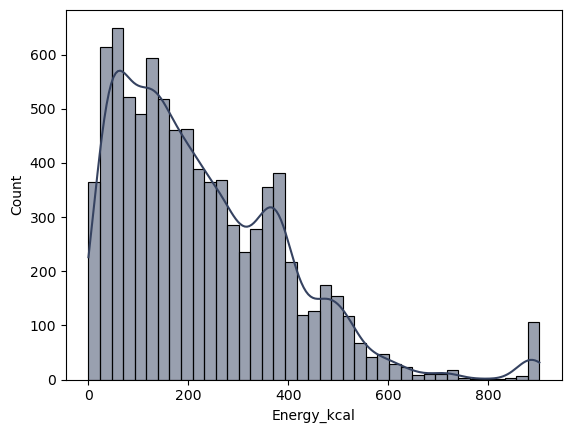

In [30]:
color = '#354260'
sns.histplot(df["Energy_kcal"], color=color, kde=True);

<h4 style="color: #005477;">Macronutrient(g) Distribution & Outliers</h4>

In [31]:
macro_nutr = numeric[['Protein_g','Carb_g','Fat_g','Sugar_g','Fiber_g']]

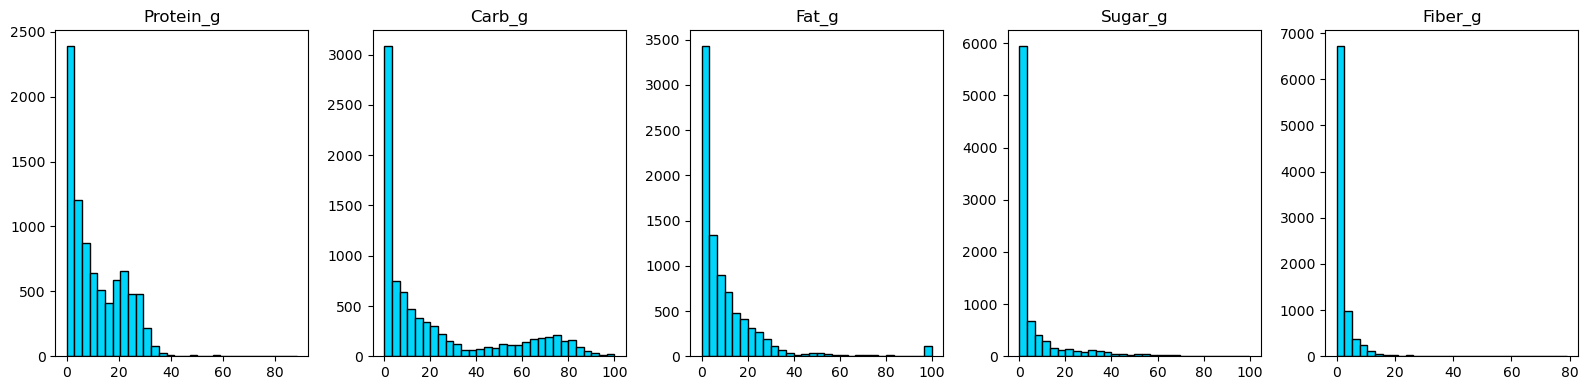

In [32]:
color = '#00d6fc'
nrows, ncols = 1, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(macro_nutr.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(macro_nutr.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(macro_nutr.columns[i])

plt.tight_layout()
plt.show()

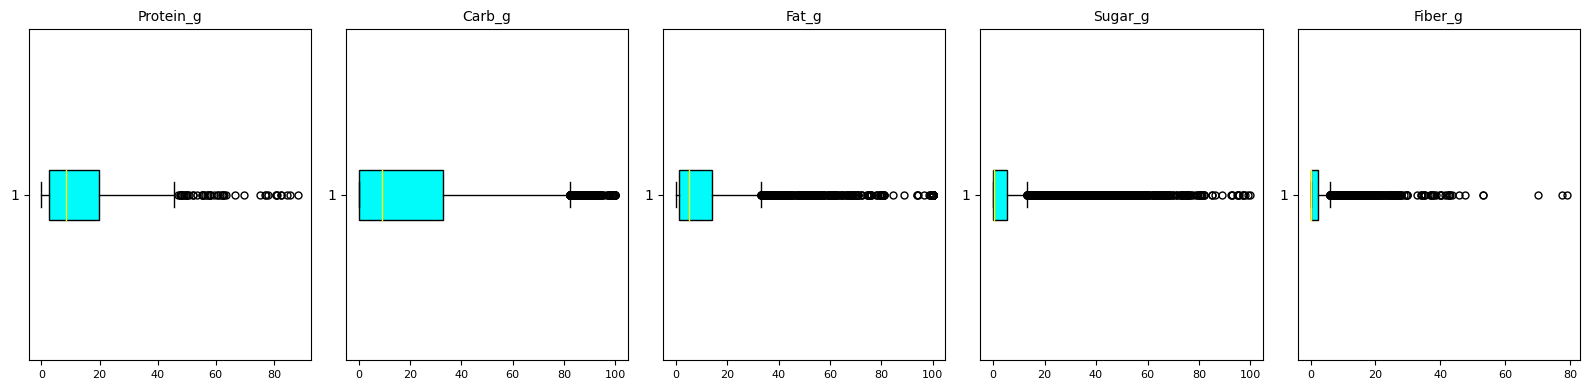

In [33]:
color = '#00fbfb'

# grid size
nrows, ncols = 1, 5 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(macro_nutr.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(macro_nutr.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(macro_nutr.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h4 style="color: #005477;">Micronutrient (mg) Distribution & Outliers </h4>

In [34]:
micro_nutr = numeric[['VitB6_mg', 'VitC_mg','VitE_mg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg','Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Zinc_mg','VitA_mg', 'VitB12_mg', 'Folate_mg', 'Copper_mg', 'Selenium_mg']]

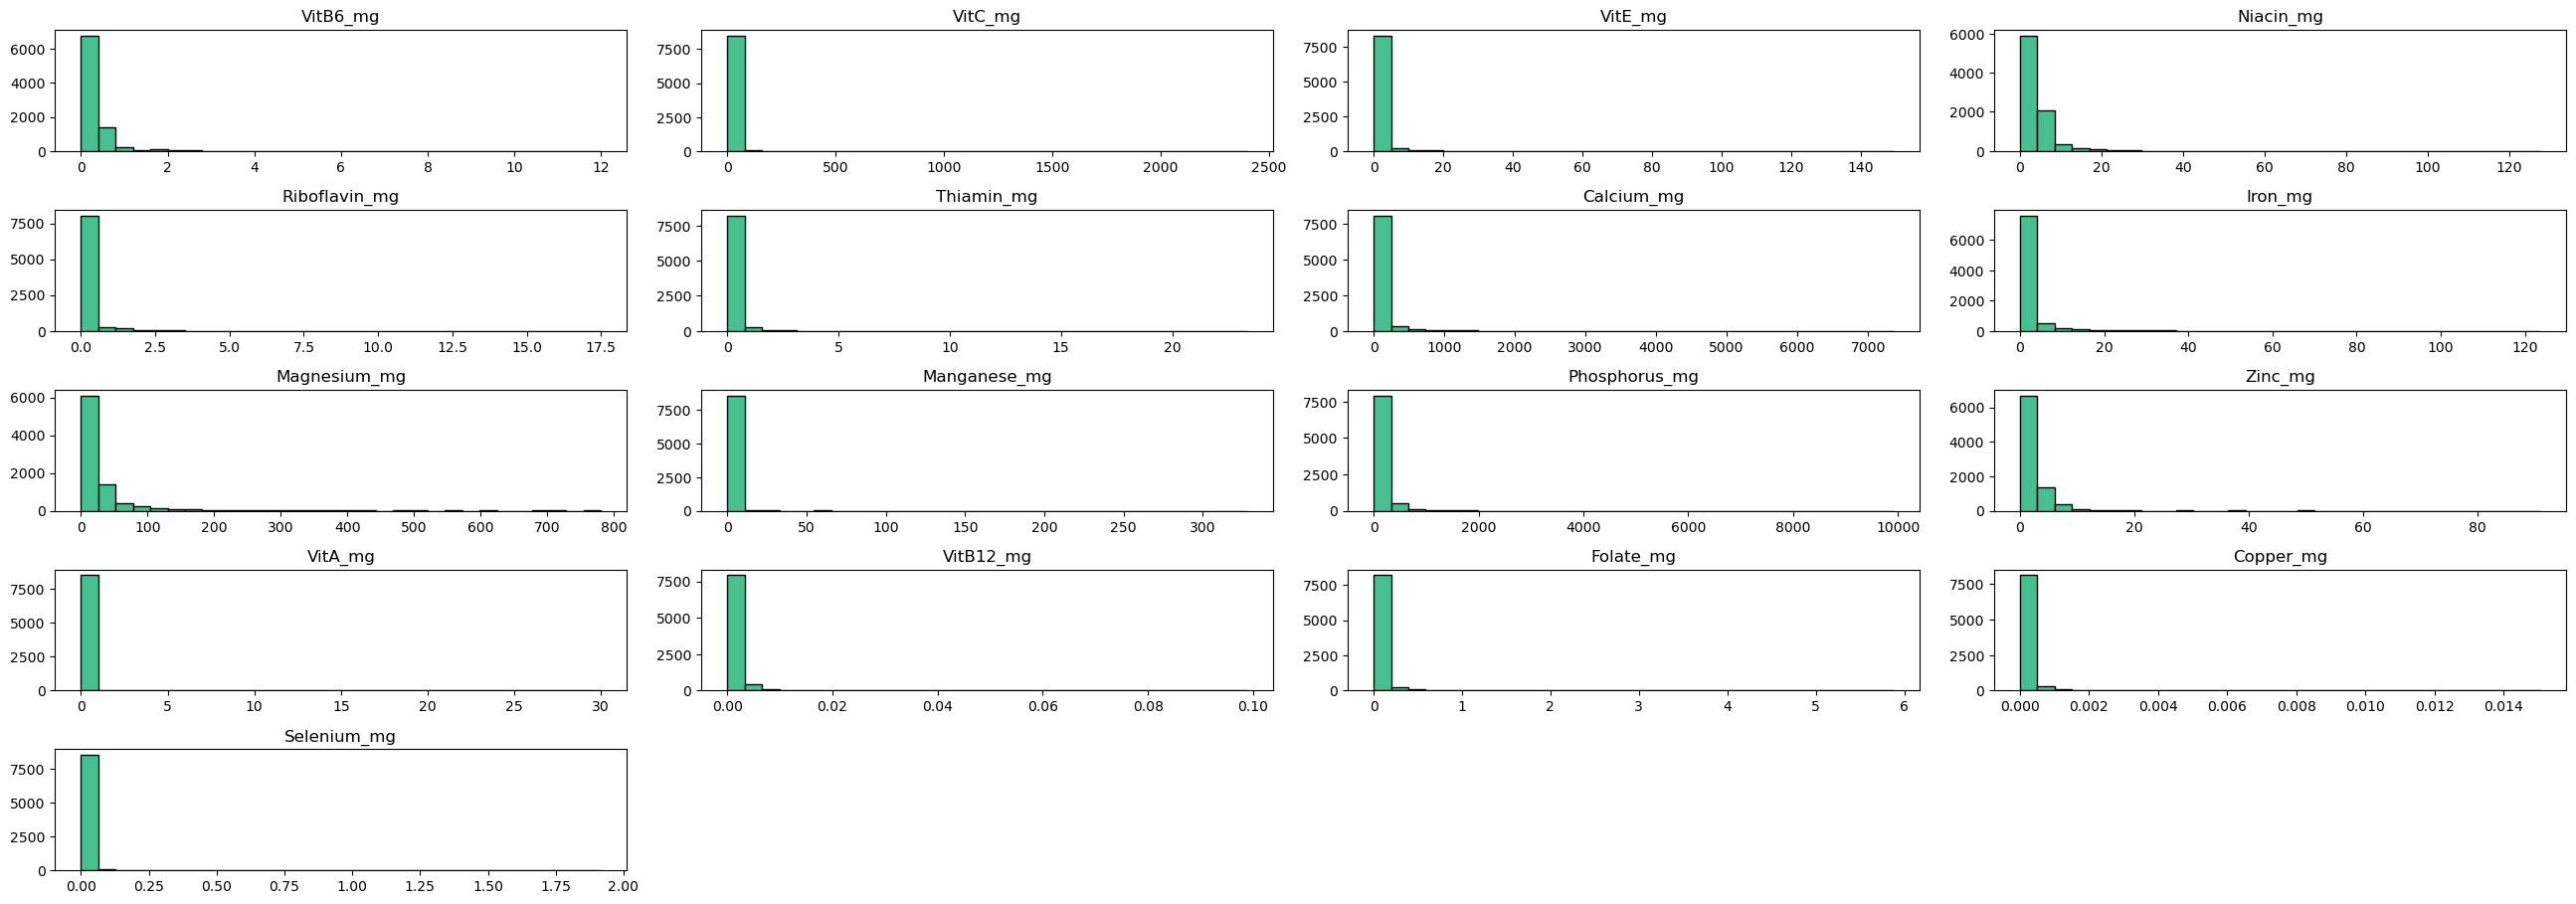

In [35]:
color = '#48bf91'

# grid size
nrows, ncols = 10, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(26, 18))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(micro_nutr.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(micro_nutr.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(micro_nutr.columns[i])

plt.tight_layout()
plt.show()

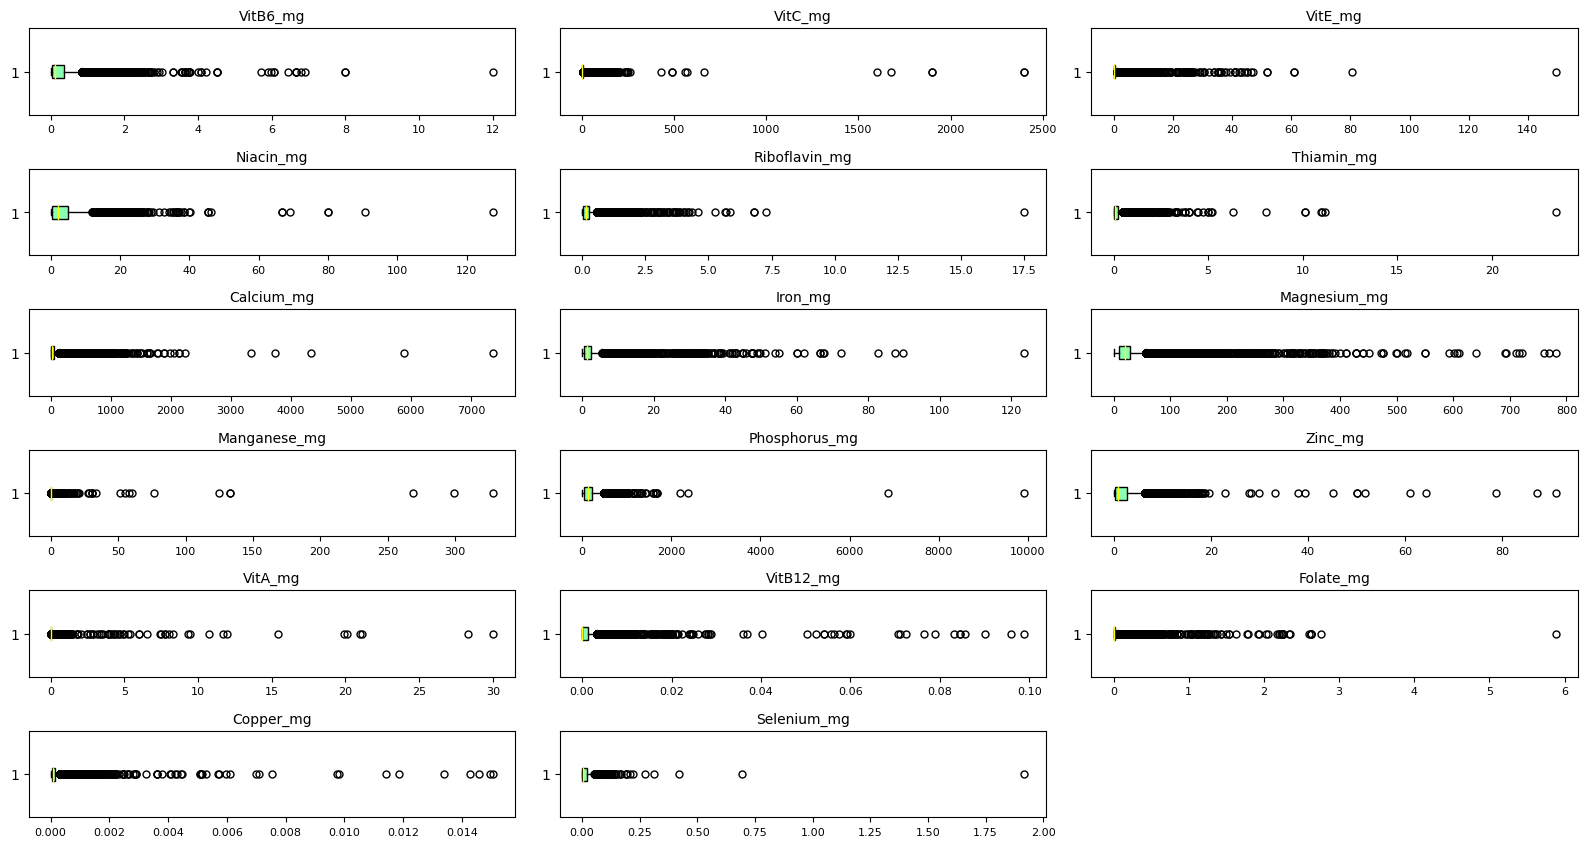

In [36]:
color = '#8affb3'

# grid size
nrows, ncols = 10, 3 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 14))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(micro_nutr.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(micro_nutr.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(micro_nutr.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

### Top and Bottom Foods considering Energy level

In [37]:
df['Energy_kcal'].min()

0.0

In [38]:
zero_energy_foods = df[df['Energy_kcal'] == 0]
zero_energy_foods[['FoodName', 'Desc','FoodGroup','Energy_kcal']]

FoodName                                               Desc  \
276                  salt                                              table   
292         seasoning mix                    dry, sazon, coriander & annatto   
4206            beverages                                        ZEVIA, cola   
4207            beverages                         ZEVIA, cola, caffeine free   
4208            beverages  water, bottled, naturally sparkling (carbonate...   
4209            beverages            ICELANDIC, Glacial Natural spring water   
4213            beverages  GEROLSTEINER BRUNNEN GmbH & Co.KG,Gerolsteiner...   
4239  carbonated beverage                                          club soda   
4252  carbonated beverage  low calorie, other than cola or pepper,  witho...   
4260  carbonated beverage  low calorie, other than cola or pepper, with a...   
4270  carbonated beverage  low calorie, cola or pepper-types, with sodium...   
4282               coffee  brewed from grounds, prepared with tap water, ...   
4347                water                                   bottled, PERRIER   
4348                water                             bottled, POLAND SPRING   
4356                water                                      tap, drinking   
4357                water                                          tap, well   
4369                water                                     tap, municipal   
4372                water                    bottled, non-carbonated, DANNON   
4373                water           bottled, non-carbonated, PEPSI, AQUAFINA   
4374                water                    bottled, non-carbonated, DASANI   
4376                water                 bottled, non-carbonated, CALISTOGA   
4377                water            bottled, non-carbonated, CRYSTAL GEYSER   
4378                water                      bottled, non-carbonated, NAYA   
4379                water     bottled, non-carbonated, DANNON Fluoride To Go   
4392  carbonated beverage  low calorie, other than cola or pepper, with s...   
4404                water                                   bottled, generic   
4407                water                     bottled, non-carbonated, EVIAN   
4408            beverages  Powerade Zero Ion4, calorie-free, assorted fla...   
5814     leavening agents                                        baking soda   
6417            sweetener             herbal extract powder from Stevia leaf   

             FoodGroup  Energy_kcal  
276   Spices and Herbs          0.0  
292   Spices and Herbs          0.0  
4206         Beverages          0.0  
4207         Beverages          0.0  
4208         Beverages          0.0  
4209         Beverages          0.0  
4213         Beverages          0.0  
4239         Beverages          0.0  
4252         Beverages          0.0  
4260         Beverages          0.0  
4270         Beverages          0.0  
4282         Beverages          0.0  
4347         Beverages          0.0  
4348         Beverages          0.0  
4356         Beverages          0.0  
4357         Beverages          0.0  
4369         Beverages          0.0  
4372         Beverages          0.0  
4373         Beverages          0.0  
4374         Beverages          0.0  
4376         Beverages          0.0  
4377         Beverages          0.0  
4378         Beverages          0.0  
4379         Beverages          0.0  
4392         Beverages          0.0  
4404         Beverages          0.0  
4407         Beverages          0.0  
4408         Beverages          0.0  
5814    Baked Products          0.0  
6417            Sweets          0.0

In [39]:
df['Energy_kcal'].max()

902.0

In [40]:
max_energy_foods = df[df['Energy_kcal'] == 902]
max_energy_foods[['FoodName', 'Desc','FoodGroup','Energy_kcal']]

FoodName                          Desc      FoodGroup  Energy_kcal
610       fat                   beef tallow  Fats and Oils        902.0
611      lard                      No_descr  Fats and Oils        902.0
664       fat                 mutton tallow  Fats and Oils        902.0
701  fish oil                     cod liver  Fats and Oils        902.0
702  fish oil                       herring  Fats and Oils        902.0
703  fish oil                      menhaden  Fats and Oils        902.0
704  fish oil  menhaden, fully hydrogenated  Fats and Oils        902.0
705  fish oil                        salmon  Fats and Oils        902.0
706  fish oil                       sardine  Fats and Oils        902.0

### Top Foods considering Protein level

In [41]:
top_10_protein_foods = df.sort_values(by='Protein_g', ascending=False).head(10)
top_10_protein_foods[['FoodName','Desc','FoodGroup', 'Protein_g']]

FoodName                                               Desc  \
4991  soy protein isolate                potassium type, crude protein basis   
6155             gelatins                            dry powder, unsweetened   
216                   egg          white, dried, stabilized, glucose reduced   
8152                 seal      bearded (Oogruk), meat, dried (Alaska Native)   
124                   egg  white, dried, powder, stabilized, glucose reduced   
151                   egg                                       white, dried   
4833  soy protein isolate                                           No_descr   
4990  soy protein isolate                                     potassium type   
4200            beverages                          Protein powder whey based   
8234      steelhead trout                    dried, flesh (Shoshone Bannock)   

                                FoodGroup  Protein_g  
4991                              Legumes      88.32  
6155                               Sweets      85.60  
216                Dairy and Egg Products      84.63  
8152  American Indian/Alaska Native Foods      82.60  
124                Dairy and Egg Products      82.40  
151                Dairy and Egg Products      81.10  
4833                              Legumes      80.69  
4990                              Legumes      80.69  
4200                            Beverages      78.13  
8234  American Indian/Alaska Native Foods      77.27

### Top Foods considering Fat level

In [42]:
top_10_fat_foods = df.sort_values(by='Fat_g', ascending=False).head(10)
top_10_fat_foods[['FoodName','Desc','FoodGroup', 'Fat_g']]

FoodName  \
706                        fish oil   
686  shortening frying (heavy duty)   
743                      shortening   
744                             oil   
684  shortening frying (heavy duty)   
745                             oil   
746                             oil   
747                             oil   
683           shortening industrial   
682        shortening confectionery   

                                                  Desc      FoodGroup  Fat_g  
706                                            sardine  Fats and Oils  100.0  
686    soybean (hydrogenated), linoleic (less than 1%)  Fats and Oils  100.0  
743  industrial, soy (partially hydrogenated), pour...  Fats and Oils  100.0  
744  industrial, soy, refined, for woks and light f...  Fats and Oils  100.0  
684                                palm (hydrogenated)  Fats and Oils  100.0  
745  industrial, soy (partially hydrogenated), mult...  Fats and Oils  100.0  
746  industrial, soy ( partially hydrogenated), all...  Fats and Oils  100.0  
747  industrial, soy (partially hydrogenated ) and ...  Fats and Oils  100.0  
683              soybean (hydrogenated) and cottonseed  Fats and Oils  100.0  
682  coconut (hydrogenated) and or palm kernel (hyd...  Fats and Oils  100.0

### Top Foods considering Carbo level

In [43]:
top_10_fat_foods = df.sort_values(by='Carb_g', ascending=False).head(10)
top_10_fat_foods[['FoodName','Desc','FoodGroup', 'Carb_g']]

FoodName  \
8509                      sweeteners   
6417                       sweetener   
6269                          sugars   
6408                           sugar   
6270                          sugars   
6407                      sweeteners   
4332  strawberry-flavor beverage mix   
6190                        desserts   
4353             orange-flavor drink   
6089                         candies   

                                          Desc  FoodGroup  Carb_g  
8509           tabletop, fructose, dry, powder     Sweets  100.00  
6417    herbal extract powder from Stevia leaf     Sweets  100.00  
6269                                granulated     Sweets   99.98  
6408                                 turbinado     Sweets   99.80  
6270                                  powdered     Sweets   99.77  
6407  for baking, contains sugar and sucralose     Sweets   99.53  
4332                                    powder  Beverages   99.10  
6190                  rennin, vanilla, dry mix     Sweets   99.00  
4353                    breakfast type, powder  Beverages   98.94  
6089             gumdrops, starch jelly pieces     Sweets   98.90

<h2 style="color: #FF6347;">Looking for Correlations</h2>

<h4 style="color: #005477;">All data </h4>

In [44]:
num_corr = numeric.corr().round(2)
num_corr

Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  \
Energy_kcal           1.00       0.11   0.81    0.49     0.31     0.20   
Protein_g             0.11       1.00   0.05   -0.30    -0.27    -0.07   
Fat_g                 0.81       0.05   1.00   -0.05    -0.00    -0.03   
Carb_g                0.49      -0.30  -0.05    1.00     0.62     0.46   
Sugar_g               0.31      -0.27  -0.00    0.62     1.00     0.12   
Fiber_g               0.20      -0.07  -0.03    0.46     0.12     1.00   
VitB6_mg              0.12       0.23  -0.05    0.20     0.09     0.24   
VitC_mg              -0.03      -0.07  -0.06    0.08     0.06     0.08   
VitE_mg               0.30      -0.03   0.34    0.07     0.07     0.16   
Niacin_mg             0.17       0.38  -0.02    0.17     0.03     0.14   
Riboflavin_mg         0.16       0.20  -0.04    0.23     0.13     0.16   
Thiamin_mg            0.19       0.10  -0.01    0.28     0.10     0.21   
Calcium_mg            0.12       0.05   0.02    0.19     0.13     0.23   
Iron_mg               0.20       0.13  -0.04    0.35     0.12     0.39   
Magnesium_mg          0.26       0.22   0.07    0.29     0.04     0.54   
Manganese_mg          0.04       0.04  -0.00    0.06     0.01     0.10   
Phosphorus_mg         0.20       0.44   0.07    0.07    -0.05     0.16   
Zinc_mg               0.11       0.42   0.03   -0.01    -0.02     0.09   
VitA_mg               0.03       0.03   0.02    0.00     0.01     0.01   
VitB12_mg            -0.01       0.25  -0.02   -0.09    -0.05    -0.05   
Folate_mg             0.15       0.01  -0.06    0.33     0.16     0.25   
Copper_mg             0.10       0.16   0.04    0.06    -0.01     0.19   
Selenium_mg           0.06       0.38   0.04   -0.11    -0.12    -0.04   

               VitB6_mg  VitC_mg  VitE_mg  Niacin_mg  ...  Iron_mg  \
Energy_kcal        0.12    -0.03     0.30       0.17  ...     0.20   
Protein_g          0.23    -0.07    -0.03       0.38  ...     0.13   
Fat_g             -0.05    -0.06     0.34      -0.02  ...    -0.04   
Carb_g             0.20     0.08     0.07       0.17  ...     0.35   
Sugar_g            0.09     0.06     0.07       0.03  ...     0.12   
Fiber_g            0.24     0.08     0.16       0.14  ...     0.39   
VitB6_mg           1.00     0.27     0.29       0.71  ...     0.48   
VitC_mg            0.27     1.00     0.07       0.21  ...     0.07   
VitE_mg            0.29     0.07     1.00       0.20  ...     0.16   
Niacin_mg          0.71     0.21     0.20       1.00  ...     0.50   
Riboflavin_mg      0.58     0.23     0.16       0.75  ...     0.51   
Thiamin_mg         0.42     0.06     0.12       0.60  ...     0.40   
Calcium_mg         0.18     0.11     0.11       0.13  ...     0.35   
Iron_mg            0.48     0.07     0.16       0.50  ...     1.00   
Magnesium_mg       0.29     0.12     0.20       0.27  ...     0.40   
Manganese_mg       0.07     0.02     0.10       0.10  ...     0.09   
Phosphorus_mg      0.21     0.01     0.07       0.26  ...     0.22   
Zinc_mg            0.45     0.02     0.17       0.47  ...     0.38   
VitA_mg            0.14     0.11     0.04       0.15  ...     0.10   
VitB12_mg          0.26     0.01     0.06       0.28  ...     0.18   
Folate_mg          0.55     0.07     0.18       0.54  ...     0.47   
Copper_mg          0.12     0.03     0.07       0.14  ...     0.18   
Selenium_mg        0.11    -0.04     0.02       0.18  ...     0.06   

               Magnesium_mg  Manganese_mg  Phosphorus_mg  Zinc_mg  VitA_mg  \
Energy_kcal            0.26          0.04           0.20     0.11     0.03   
Protein_g              0.22          0.04           0.44     0.42     0.03   
Fat_g                  0.07         -0.00           0.07     0.03     0.02   
Carb_g                 0.29          0.06           0.07    -0.01     0.00   
Sugar_g                0.04          0.01          -0.05    -0.02     0.01   
Fiber_g                0.54          0.10           0.16     0.09     0.01   
VitB6_mg   

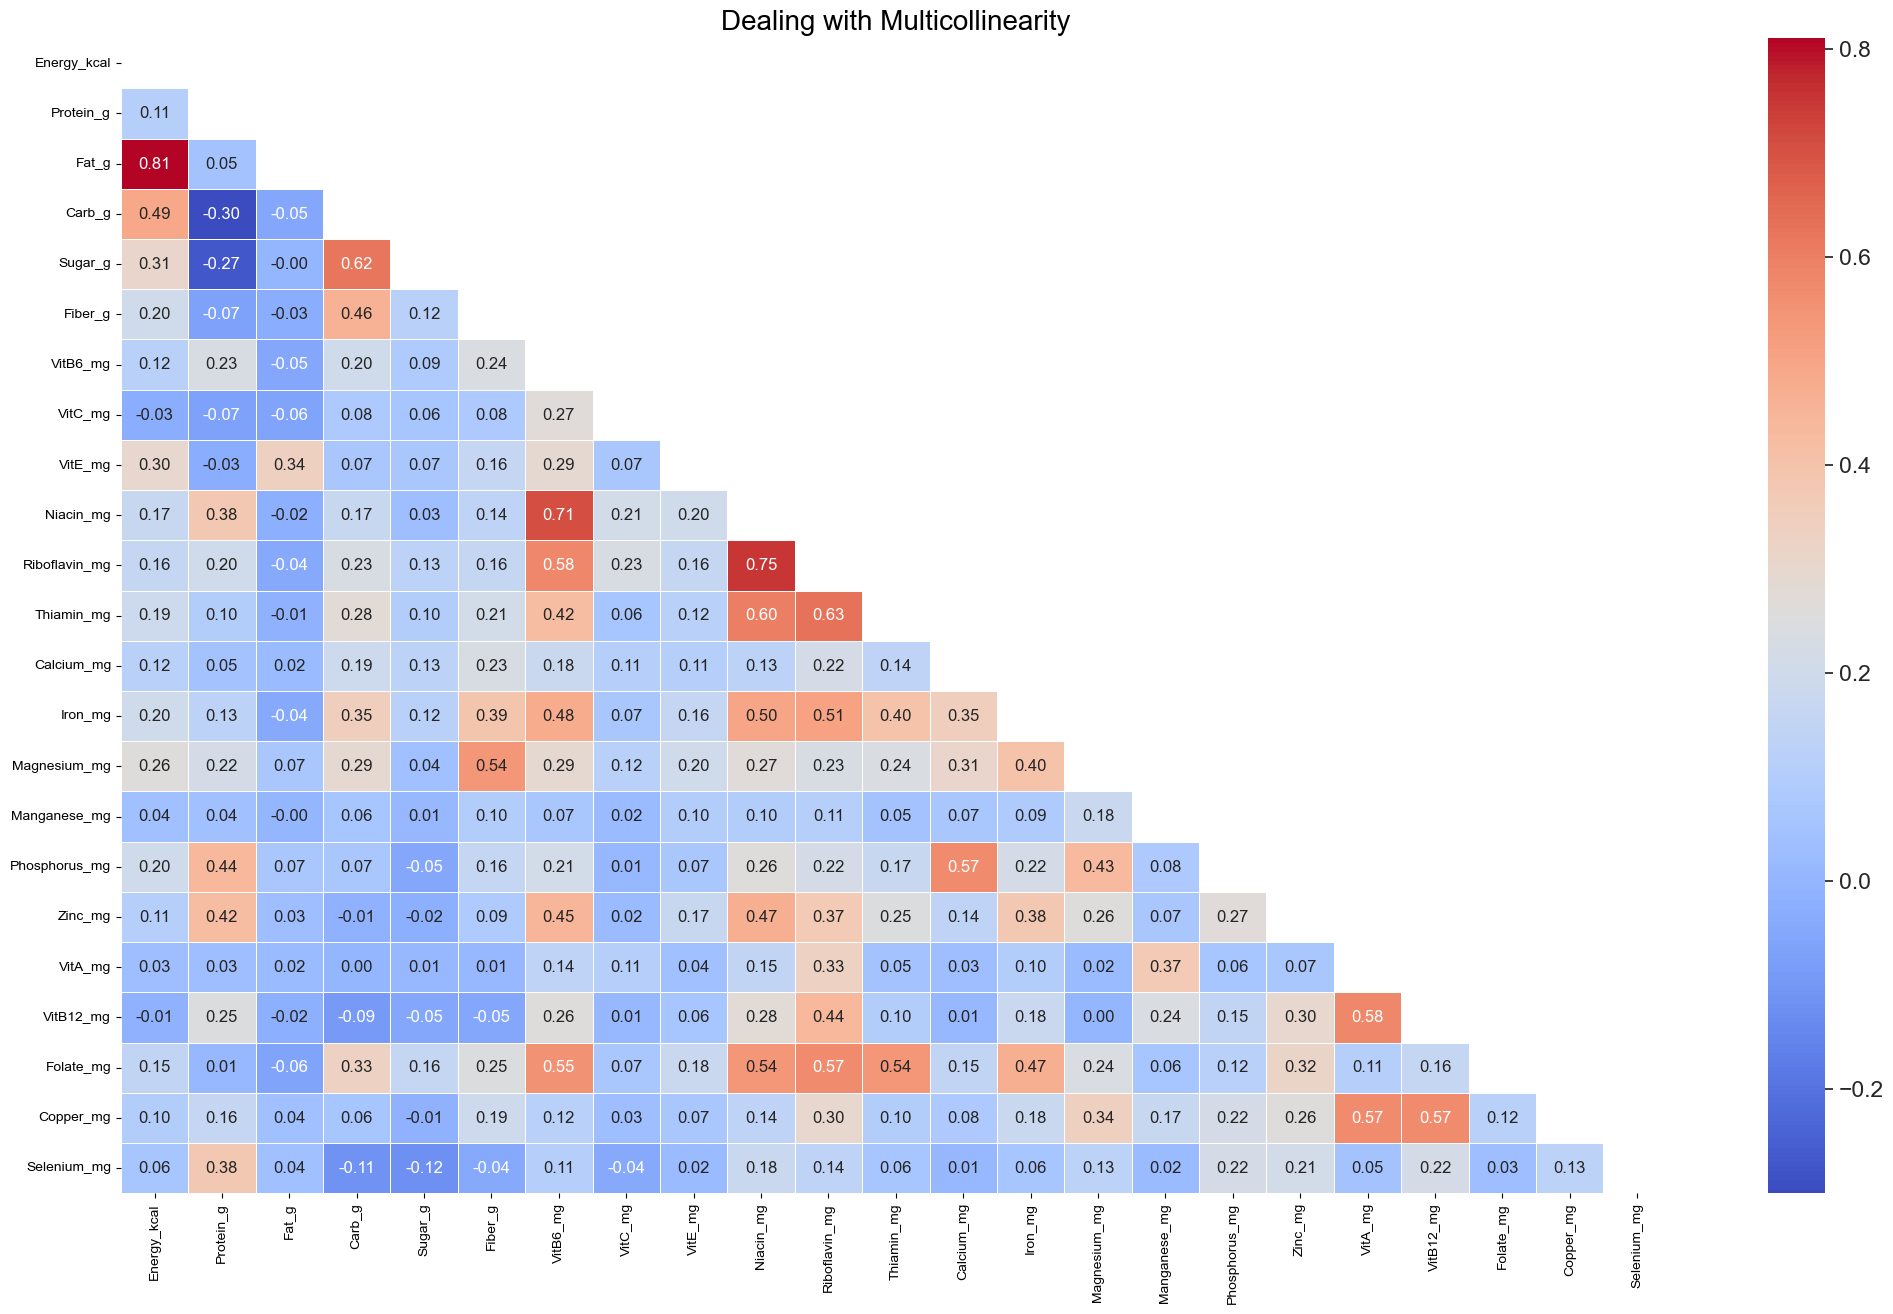

In [45]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h4 style="color: #005477;">Macros and Energy </h4>

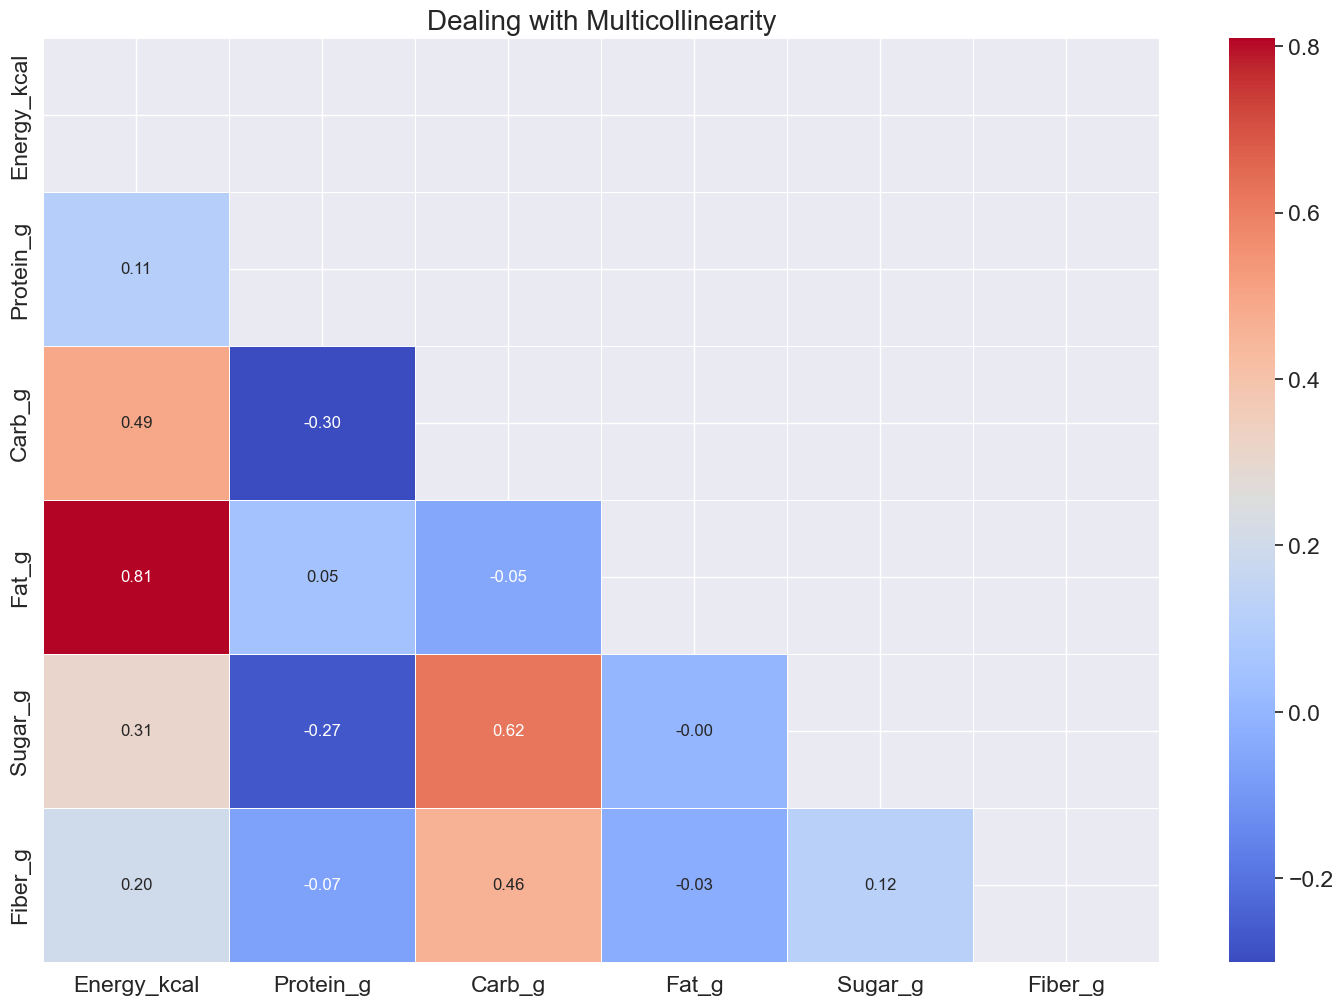

In [46]:
macro_cal = numeric[['Energy_kcal','Protein_g','Carb_g','Fat_g','Sugar_g','Fiber_g']]
macro_cal_corr = macro_cal.corr().round(2)
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(macro_cal_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(18, 12))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(macro_cal_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

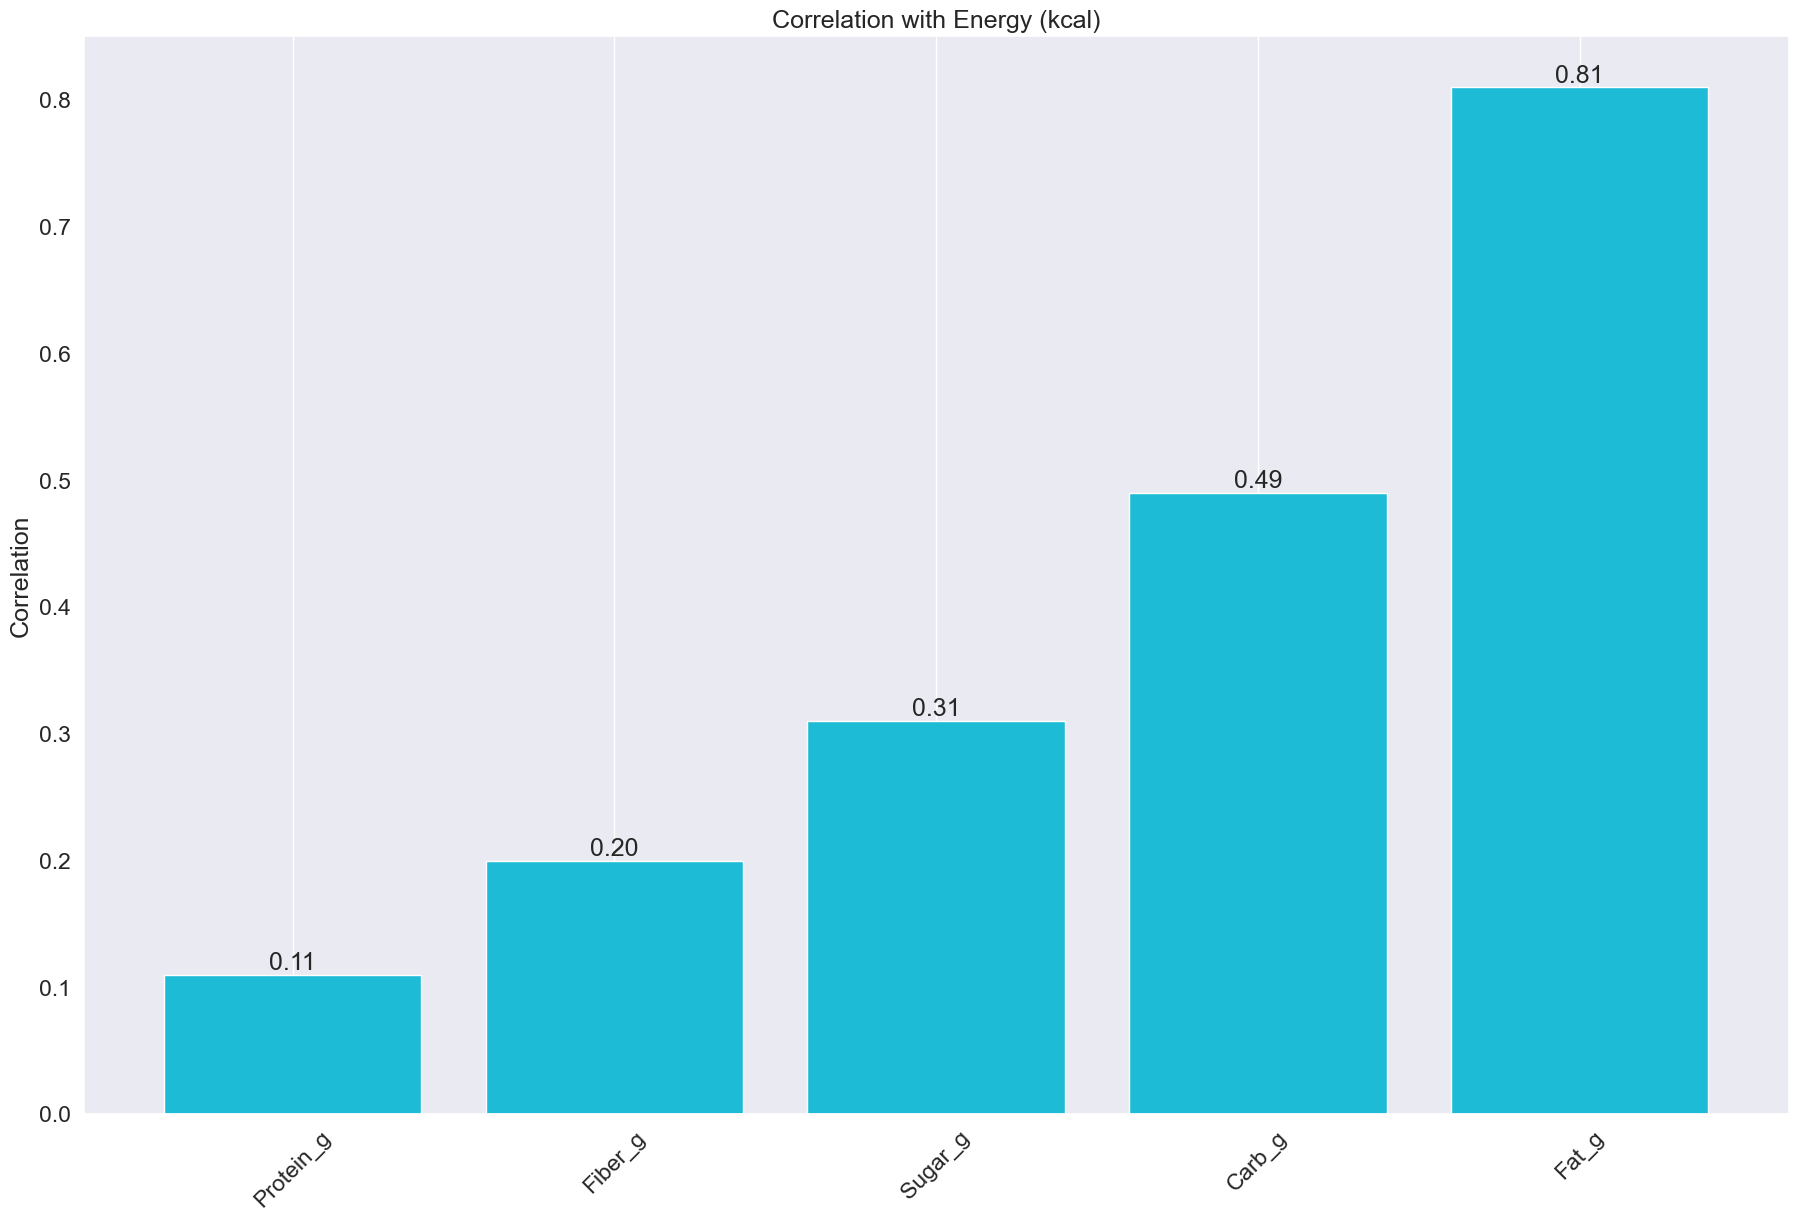

In [47]:
correlations = macro_cal.corrwith(macro_cal['Energy_kcal']).round(2).sort_values(ascending=True)
# Plot the correlation with calary
color = '#1ebbd7'
plt.figure(figsize=(22, 14))
ax = correlations.drop('Energy_kcal').plot(kind='bar', color=color, width=0.80)
plt.title('Correlation with Energy (kcal)')
#plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add correlation values above the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

plt.show()

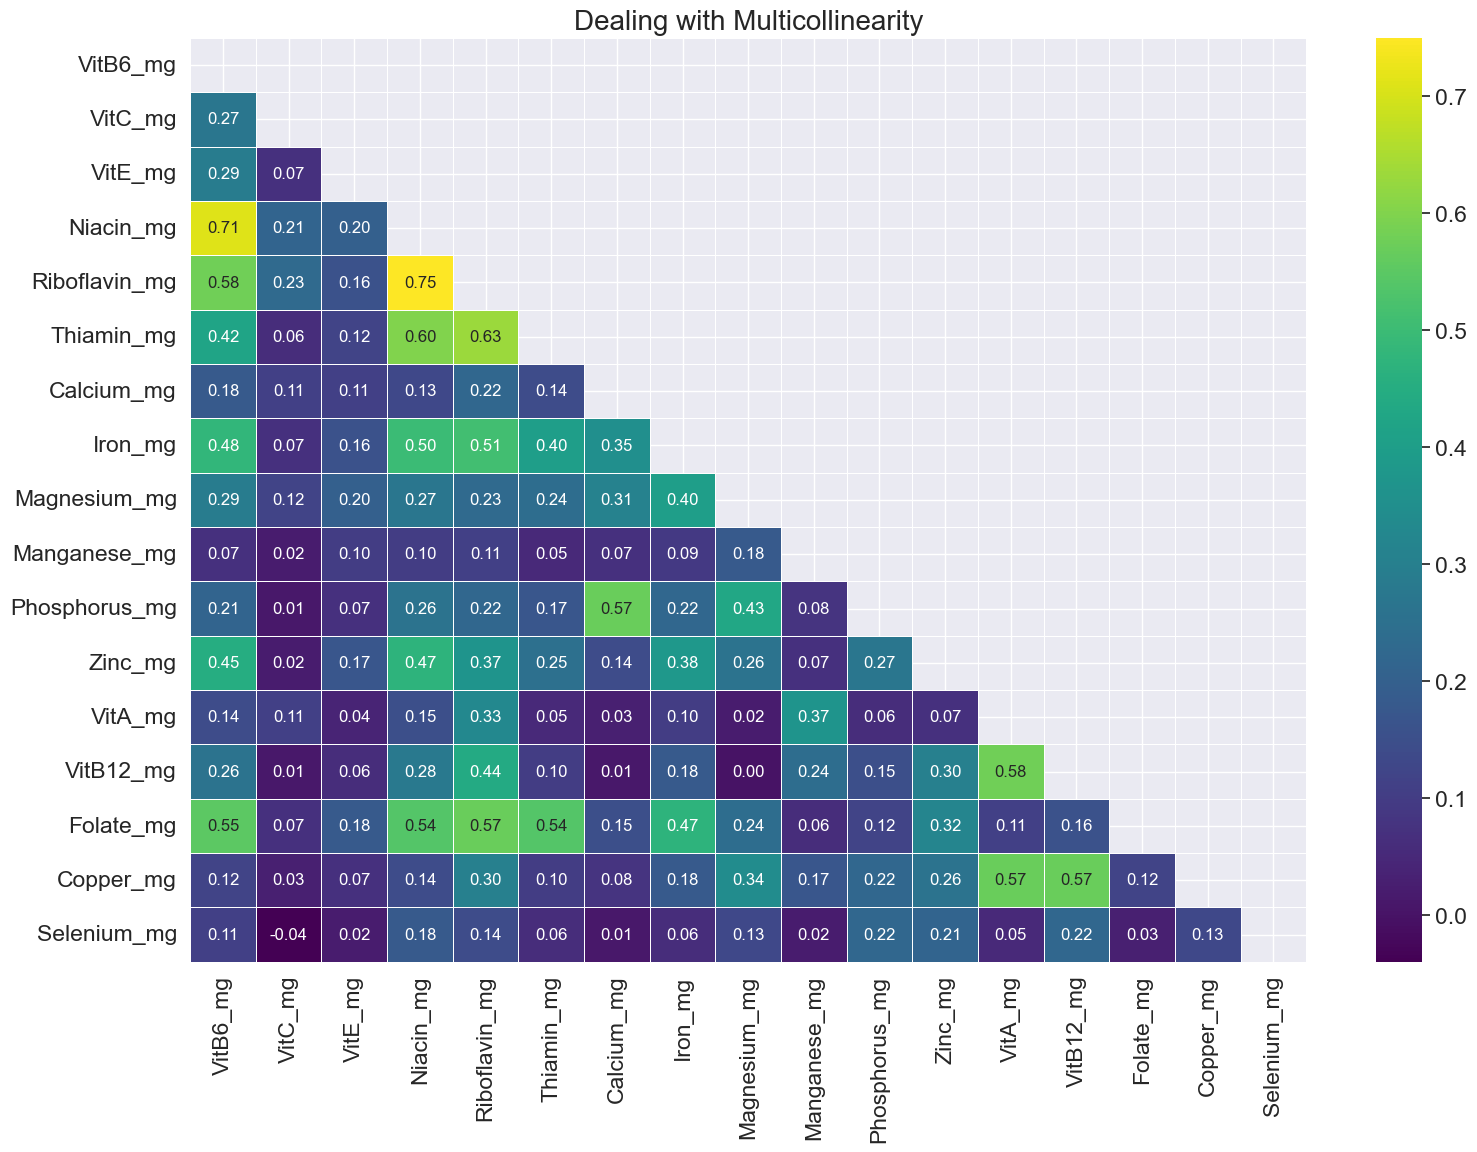

In [48]:
micro_nutr_corr = micro_nutr.corr().round(2)
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(micro_nutr_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(18, 12))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(micro_nutr_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="viridis", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

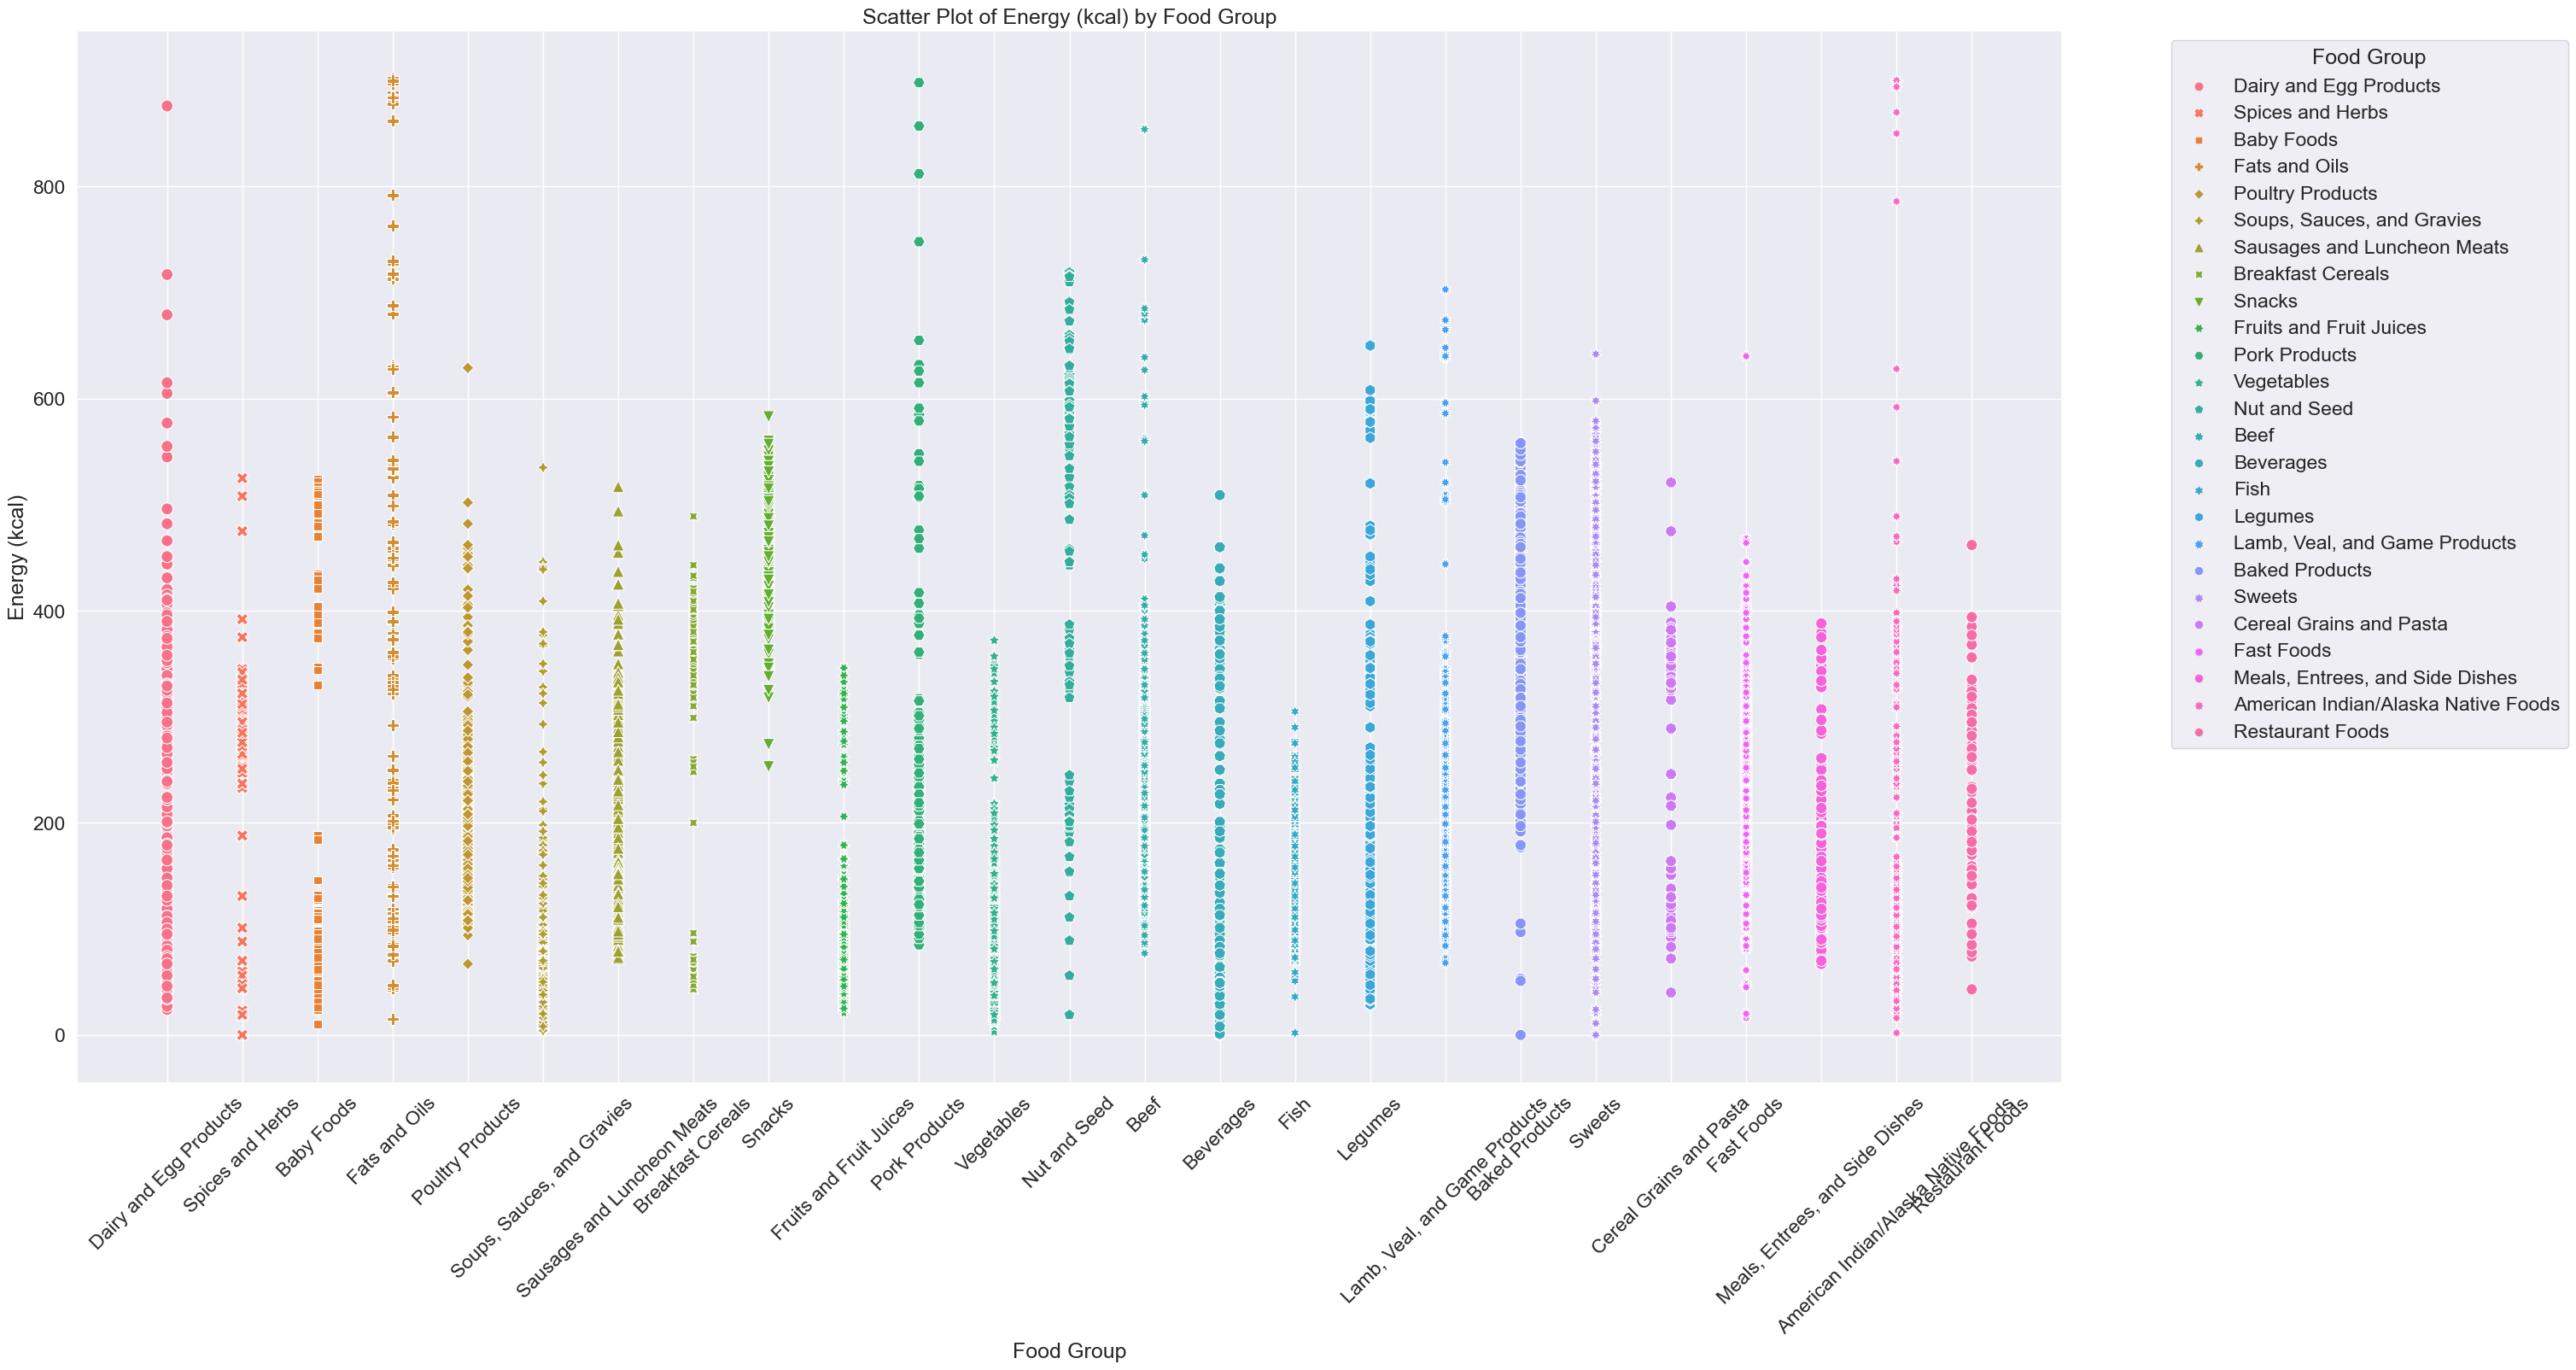

In [49]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(30, 16))
sns.scatterplot(data=df, x='FoodGroup', y='Energy_kcal', hue='FoodGroup', style='FoodGroup', s=100)

# Customize the plot
plt.title('Scatter Plot of Energy (kcal) by Food Group')
plt.xlabel('Food Group')
plt.ylabel('Energy (kcal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Food Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

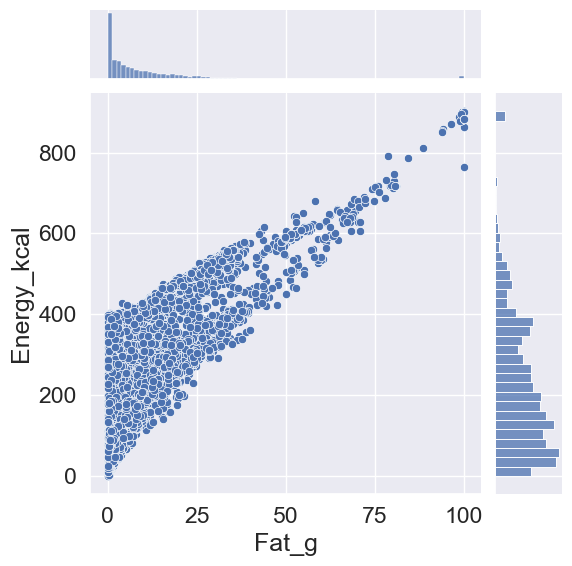

In [50]:
sns.jointplot(y=numeric['Energy_kcal'], x=numeric['Fat_g'])

/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



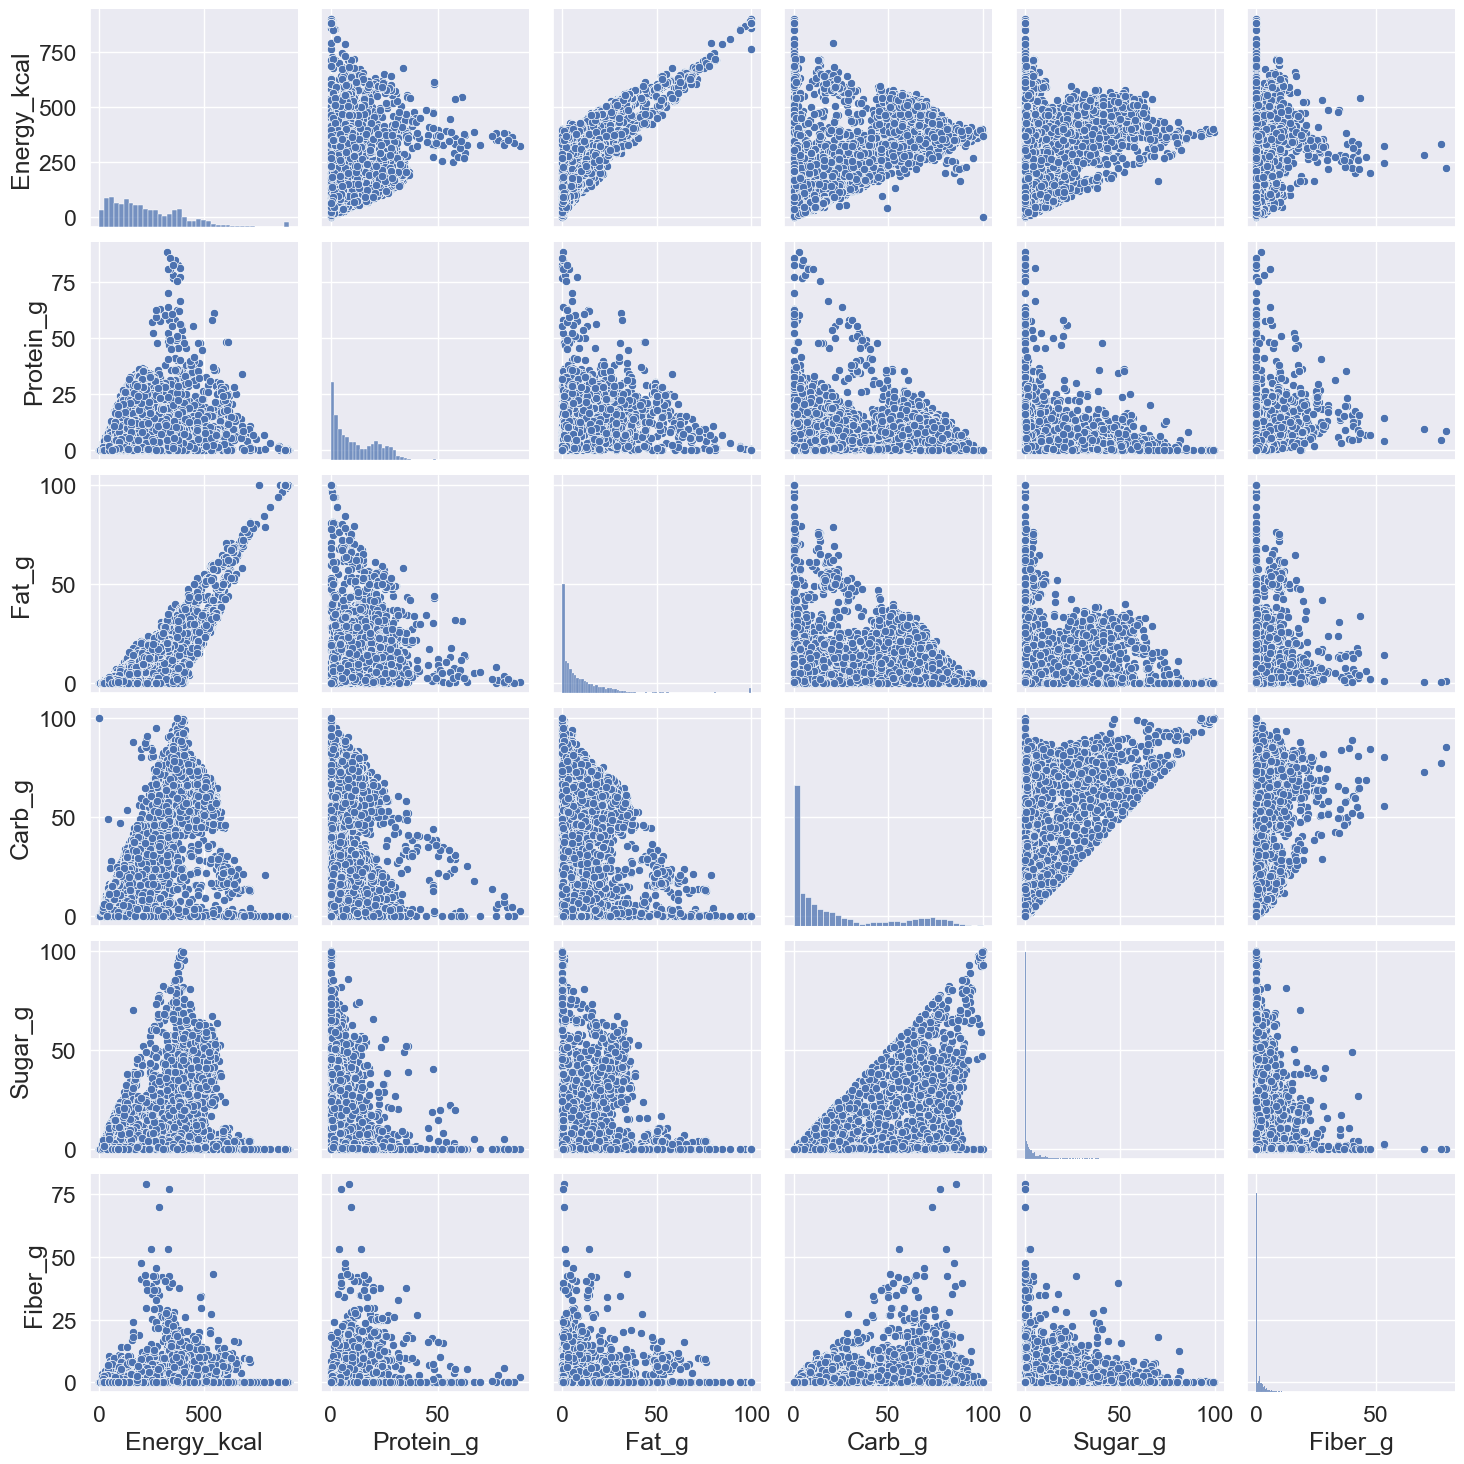

In [51]:
sns.pairplot(numeric[["Energy_kcal", "Protein_g","Fat_g","Carb_g","Sugar_g","Fiber_g"]])   

<h3 style="color: #FF6347;">Top 10 high-calcium food list </h3>

In [52]:
# Sort the DataFrame by 'Calcium_mg' in descending order and select the top 10 rows
top_10_calcium = df.sort_values(by='Calcium_mg', ascending=False).head(10)

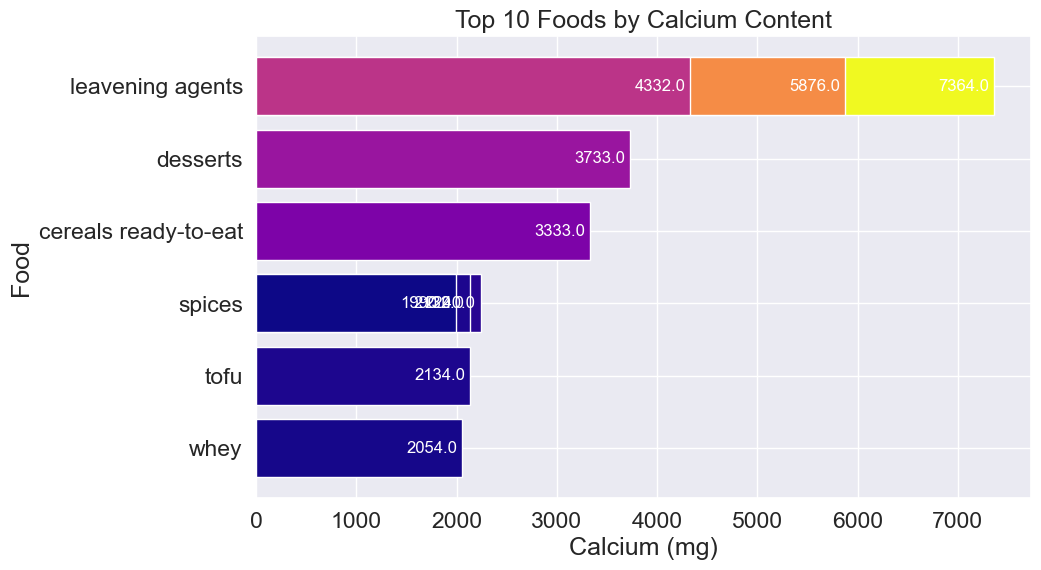

In [53]:
# Sort the DataFrame by Calcium_mg in descending order and get top 10
df_sorted = df.sort_values('Calcium_mg', ascending=False).head(10)

# Normalize the calcium values to use with the viridis colormap
norm = plt.Normalize(df_sorted['Calcium_mg'].min(), df_sorted['Calcium_mg'].max())
colors = plt.cm.plasma(norm(df_sorted['Calcium_mg']))




# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['FoodName'], df_sorted['Calcium_mg'], color=colors)

# Add titles and labels
plt.title('Top 10 Foods by Calcium Content')
plt.xlabel('Calcium (mg)')
plt.ylabel('Food')

# Add numbers inside the bars
for bar in bars:
    plt.text(bar.get_width() - 50,  # X-coordinate of the text
             bar.get_y() + bar.get_height() / 2,  # Y-coordinate of the text
             f'{bar.get_width()}',  # Text to display
             va='center', ha='right', color='white', fontsize=12)  # Alignment and text properties

# Invert y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

<h1 style="color: #07caa6;">04 | Hypothesis Testing</h1>

In [54]:
#Null Hypothesis (H0): The average Fat content in Fast Foods is equal to that in Restaurant Food .
#Alternative Hypothesis (H1): The average Fat content in Fast Foods is higher than in Restaurant Food.

In [55]:
#Perform the t-test:
# I use a one-tailed t-test (right) since want to know whether fast foods have more fat than restaurant foods

In [56]:
import scipy.stats as st

# Split the data into two groups
fast_foods = df[df['FoodGroup'] == 'Fast Foods']['Fat_g']
restaurant_foods = df[df['FoodGroup'] == 'Restaurant Foods']['Fat_g']

# Perform a two-sample t-test (one-tailed, assuming equal variances)
t_stat, p_value = st.ttest_ind(fast_foods, restaurant_foods, equal_var=True, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Fast foods have significantly more fat content than restaurant foods.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fat content between fast foods and restaurant foods.")

T-statistic: 2.1390812659300558
P-value: 0.0164680791483062
Reject the null hypothesis: Fast foods have significantly more fat content than restaurant foods.
